In [1]:
import datetime as dt
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import glob
from tidegauge_functions import read_GPS_nam14_UNAVCO

%matplotlib inline

In [2]:
datum = 'WTHG.cwu.nam14.csv'
dir_in = 'data/GPS'

In [3]:
pattern = os.path.join(dir_in, datum)
print(pattern)

data/GPS\WTHG.cwu.nam14.csv


In [4]:
filenames = sorted(glob.glob(pattern))  # , key=alphanum_key)

In [5]:
for f, filepath in enumerate(filenames):
    df = read_GPS_nam14_UNAVCO(filepath)
    print(f'\n\n{filepath}')
    print(df.head())



data/GPS\WTHG.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality
Date                                                                     
2009-08-14   0.00  0.00      0.00      2.07     1.54         9.19   repro
2009-08-15   0.54 -0.44     -3.31      2.08     1.54         9.26   repro
2009-08-16   1.36 -0.24     -3.04      2.08     1.53         9.22   repro
2009-08-17   1.60 -0.59      0.63      2.09     1.53         9.29   repro
2009-08-18   2.41 -0.45      4.07      2.10     1.54         9.33   repro


In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(df, var, site, period):  
    
    decomposition = seasonal_decompose(df[var], freq = period)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    Amplitude = max(seasonal) - min(seasonal)
    
    decomposition.plot();
    df['denoised'] = df[var] - residual
    df['trend'] = trend
    print(f'\n\n{filepath}')
    print(df.head())
    print(f'{site} Seasonal Amplitude =', Amplitude)
    seasonal_amp = pd.DataFrame(list(zip(list({site}), list(Amplitude))),
                            colums = ['Site_Name', 'Seasonal_Amplitude'])
    seasonal_amp.to_csv('GPS_Seasonal_Amplitude_SONEL')

# Change Point Detection
def change_pt_detection(df, var, points):
    model = "l1"  
    algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
    my_bkps = algo.predict(n_bkps=10)

    
def change_pt_plot()
    rpt.show.display(points, my_bkps, figsize=(10, 6))
    plt.suptitle(f"{site}Change Point Detection")
    plt.show()

In [26]:
def test_calc_OLS(df, var, start, end):
    df = df[start:end]
    x, y = np.arange(len(df[var].dropna())), df[var].dropna()
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    res = model.fit()
    return res

def test_plot_OLS(df, res, res2, site, var, trend_array, trend_array2, start, end, start2, end2):
    df1 = df[start:end]
    df2 = df[start2:end2]
    fig, ax = plt.subplots(1, 1, figsize=(12,6));
    ax.plot(df1[var].dropna().index, df1[var].dropna().values, 
            label='trend', marker='.', linestyle='', color = 'darkgrey')
    ax.plot(df1[var].dropna().index, [res1.params.x1*i + res1.params.const for i in np.arange(len(df1[var].dropna()))],
           marker = '', linestyle = '-', color = 'red')
    # ax[1].plot(df['Vertical'].dropna().index, res.resid.values);
    # ax[1].plot(df['Vertical'].dropna().index, np.abs(res.resid.values));
    # ax[1].hlines(0, 0, len(res.resid), color='k');
    # ax[1].set_title("Residuals");
    ax.plot(df2[var].dropna().index, df2[var].dropna().values, 
            label='trend', marker='.', linestyle='', color = 'darkgrey')
    ax.plot(df2[var].dropna().index, [res2.params.x1*i + res2.params.const for i in np.arange(len(df2[var].dropna()))],
           marker = '', linestyle = '-', color = 'blue')
    # ax[1].plot(df['Vertical'].dropna().index, res.resid.values);
    # ax[1].plot(df['Vertical'].dropna().index, np.abs(res.resid.values));
    # ax[1].hlines(0, 0, len(res.resid), color='k');
    plt.axvline(dt.datetime(2013, 1, 1), color= 'red', linestyle='--')
    ax.set_title(f" Melt Anomaly Trend = {trend_array * 1:.2f} mm/yr, Post Melt Anomaly = {trend_array2 * 1:.2f} mm/yr", fontsize=18);
    # ax[1].set_title("Residuals");
    plt.suptitle("Walterhausen Glacier, Greenland", fontsize=20)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Vertical Land Motion (mm)', fontsize=18)
    plt.rc('xtick',labelsize=16)
    plt.rc('ytick',labelsize=16)
    plt.savefig(f'figs/test_GPS_OLS_split_{site}.png')
    
    

In [29]:
for f, filepath in enumerate(filenames):
    print(f'\n\n{filepath}')
    print(f'f: {f}')
    df = read_GPS_SONEL(filepath)
    df = decompose(df, 'Vertical', filepath[-24:-20], 365)
    



data/GPS\WTHG.cwu.nam14.csv
f: 0


NameError: name 'read_GPS_SONEL' is not defined

In [8]:
def convert_trend_toyearly(df, res):
    
    period = df.index.year.value_counts().max()
    yearlytrend = res.params.x1 * period
    
    return yearlytrend

In [ ]:
df = read_GPS_nam14_UNAVCO(filepath)
df.plot()



data/GPS\WTHG.cwu.nam14.csv
f: 0
Trend 1 = 7.48 mm/yr
                            OLS Regression Results                            
Dep. Variable:               Vertical   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     549.7
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           3.71e-96
Time:                        16:36:18   Log-Likelihood:                -3224.6
No. Observations:                 946   AIC:                             6453.
Df Residuals:                     944   BIC:                             6463.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

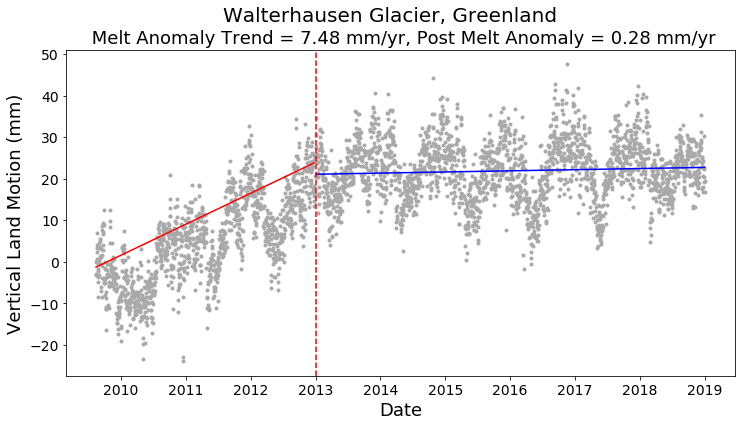

In [27]:
UNAVCO_trend_array = np.full(np.shape(filenames)[0], np.nan)
UNAVCO_trend_array2 = np.full(np.shape(filenames)[0], np.nan)
site_name_array = []


for f, filepath in enumerate(filenames):
    print(f'\n\n{filepath}')
    print(f'f: {f}')
    ## ToDo - extract and keep other important thing about each site from the file...Lat/Lon, name, etc.
    
    # Read in data
    df = read_GPS_nam14_UNAVCO(filepath)
    
    # Get trend using linear regression
    res1 = test_calc_OLS(df, 'Vertical', '2010-6-1', '2013-1-1')
    UNAVCO_trend_array[f] = convert_trend_toyearly(df, res1)
    
    res2 = test_calc_OLS(df, 'Vertical', '2013-1-2','2019-1-1')
    UNAVCO_trend_array2[f] = convert_trend_toyearly(df, res2)
    
    # Save site name
    site_name_array.append(filepath[-24:-20])
    
    print(f"Trend 1 = {UNAVCO_trend_array[f] * 1:.2f} mm/yr")
    print(res1.summary())
    print(f"Trend 2 = {UNAVCO_trend_array2[f] * 1:.2f} mm/yr")
    print(res2.summary())
   # np.savetxt('GPS_trend.csv', {UNAVCO_trend_array[f] * 365:.2f}, delimiter=',')
   
    # Make Plot
    test_plot_OLS(df, res1, res2, filepath[-18:-14], 'Vertical', UNAVCO_trend_array[f], UNAVCO_trend_array2[f], '2009-6-1','2013-1-1', '2013-1-2', '2019-1-1')
    